# Ultralytics Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [1]:
# !cd ~/git/Vancouver-Watching; pip3 install -e .

In [2]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [3]:
from IPython.display import Image
from abcli import file
from abcli import fullname
from abcli.modules import objects
from abcli import string
from abcli.plugins import seed
from vancouver_watching.ai.classes import Ultralytics_API
import matplotlib.pyplot as plt

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2670.1-unknown, built on 02 February 2024, 19:12:26


In [4]:
object_name = "2024-01-11-18-18-04-55658"
filename = "georgiaE.jpg"

object_path = objects.object_path(object_name)

In [5]:
%%bash -s $object_name $filename
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1
filename=$2

abcli download filename=$filename $object_name

🔋 gpu: not found.
🚀 abcli-7.2670.1.2023-06-aws-batch-a
downloading 2024-01-11-18-18-04-55658/georgiaE.jpg ...
download: s3://kamangir/bolt/2024-01-11-18-18-04-55658/georgiaE.jpg to ../../../storage/abcli/2024-01-11-18-18-04-55658/georgiaE.jpg
download completed: 2024-01-11-18-18-04-55658 georgiaE.jpg


---

In [6]:
ultralytics_api = Ultralytics_API(model_id = "R6nMlK6kQjSsQ76MPqQM")

Ultralytics_API.url: https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM


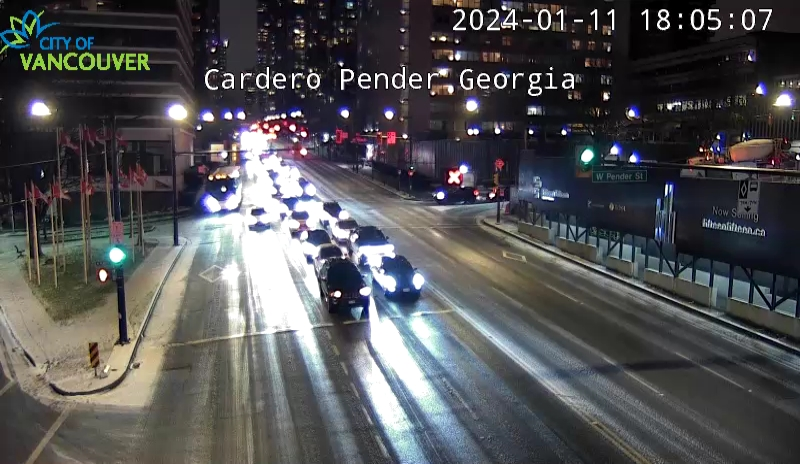

In [7]:
image_filename = os.path.join(object_path, filename)
Image(image_filename)

In [8]:
success, response_dict = ultralytics_api.infer(image_filename)
assert success
# response_dict

Ultralytics_API.infer(/Users/kamangir/storage/abcli/2024-01-11-18-18-04-55658/georgiaE.jpg)
vancouver_watching.ai.infer(/Users/kamangir/storage/abcli/2024-01-11-18-18-04-55658/georgiaE.jpg) failed, status_code: 429, reason: Too Many Requests.


AssertionError: 

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ultralytics_api.render(
    file.load_image(image_filename)[1].copy(),
    response_dict
))
plt.show()

---

In [ ]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

In [ ]:
seed.log(object_name)

In [ ]:
# END